Final Weights (W0, W1, W2): [-0.1   0.1   0.05]


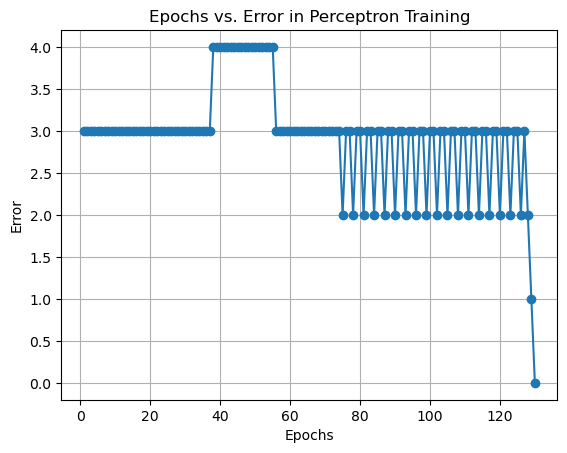

Number of epochs needed for convergence: 130


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the weights and learning rate
c = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Defining the activation function 
def activation_function(x):
    return 1 if x > 0 else 0

# Defining the input data 
x = np.array([
    [1, 0, 0], 
    [1, 0, 1],  
    [1, 1, 0],  
    [1, 1, 1]   
])

# Defining the target labels 
target_labels = np.array([0, 0, 0, 1])

# Training the perceptron and recording errors for each epoch
epochs = 1000  
error_history = []  

for epoch in range(epochs):
    errors = 0
    for i in range(len(X)):
        input_data = X[i]
        target = target_labels[i]
        
        # Calculating the weighted sum of inputs
        weighted_sum = np.dot(input_data, W)
        
        # Applying the activation function
        prediction = activation_function(weighted_sum)
        
        # Calculating the error
        error = target - prediction
        
        # Updating the weights
        delta_weights = learning_rate * error * input_data
        c += delta_weights
        
        errors += abs(error)
    
    error_history.append(errors)
    
    # Checking if all examples are classified correctly
    if errors == 0:
        break

# Printing the final weights
print("Final Weights (W0, W1, W2):", W)

# Calculating the sum-square error against all training samples for each epoch
epoch_numbers = list(range(1, len(error_history) + 1))

# Plotting the epochs against the error values
plt.plot(epoch_numbers, error_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in Perceptron Training')
plt.grid(True)
plt.show()

# Printing the number of epochs needed for convergence
print(f"Number of epochs needed for convergence: {len(error_history)}")


Number of epochs needed for convergence (Bi-Polar Step): 1000
Number of epochs needed for convergence (Sigmoid): 1000
Number of epochs needed for convergence (ReLU): 1000


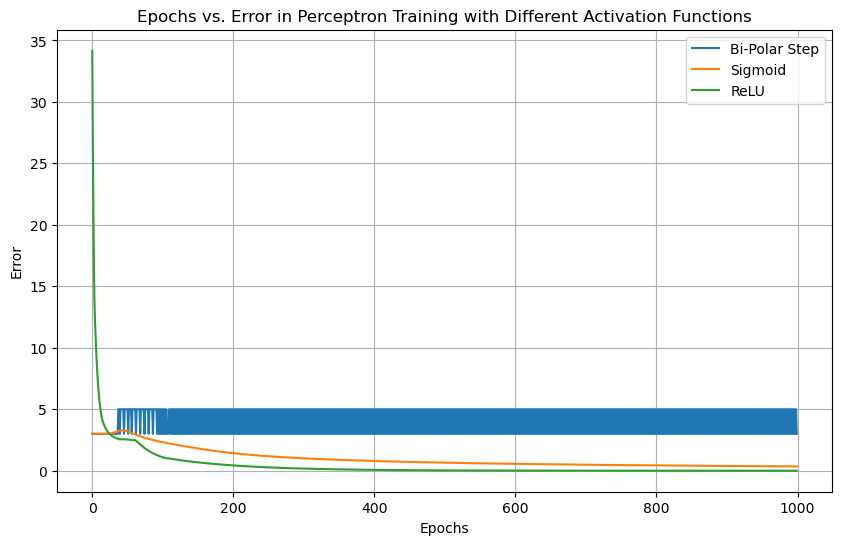

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing the weights and learning rate
c = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Defining the input data 
X = np.array([
    [1, 0, 0], 
    [1, 0, 1],  
    [1, 1, 0],  
    [1, 1, 1]   
])

# Defining the target labels (desired outputs)
target_labels = np.array([0, 0, 0, 1])

# Defining the activation functions
def bipolar_step_activation(x):
    return 1 if x > 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Training function for perceptron
def train_perceptron(activation_function):
    W_current = np.copy(W)
    error_history = []
    max_epochs = 1000

    for epoch in range(max_epochs):
        errors = 0

        for i in range(len(X)):
            input_data = X[i]
            target = target_labels[i]

            # Calculate the weighted sum of inputs
            weighted_sum = np.dot(input_data, W_current)

            # Apply the activation function
            prediction = activation_function(weighted_sum)

            # Calculate the error
            error = target - prediction

            # Update the weights
            delta_weights = learning_rate * error * input_data
            W_current += delta_weights

            errors += abs(error)

        error_history.append(errors)

        # Check if all examples are classified correctly
        if errors == 0:
            break

    return error_history

# Training with Bi-Polar Step activation
error_history_bipolar_step = train_perceptron(bipolar_step_activation)
print(f"Number of epochs needed for convergence (Bi-Polar Step): {len(error_history_bipolar_step)}")

# Training with Sigmoid activation
error_history_sigmoid = train_perceptron(sigmoid_activation)
print(f"Number of epochs needed for convergence (Sigmoid): {len(error_history_sigmoid)}")

# Training with ReLU activation
error_history_relu = train_perceptron(relu_activation)
print(f"Number of epochs needed for convergence (ReLU): {len(error_history_relu)}")

# Plotting the error values for each activation function
plt.figure(figsize=(10, 6))
plt.plot(range(len(error_history_bipolar_step)), error_history_bipolar_step, label='Bi-Polar Step')
plt.plot(range(len(error_history_sigmoid)), error_history_sigmoid, label='Sigmoid')
plt.plot(range(len(error_history_relu)), error_history_relu, label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title('Epochs vs. Error in Perceptron Training with Different Activation Functions')
plt.grid(True)
plt.show()


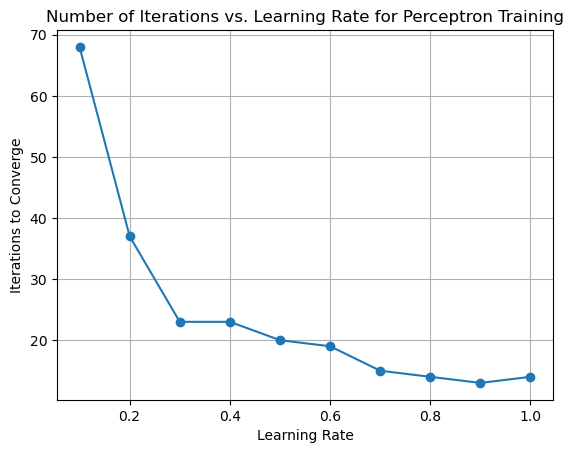

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing the weights
c = np.array([10, 0.2, -0.75])

# Defining the input data 
X = np.array([
    [1, 0, 0],  
    [1, 0, 1],  
    [1, 1, 0],  
    [1, 1, 1]   
])

# Defining the target labels 
target_labels = np.array([0, 0, 0, 1])

# Listing of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Function to train the perceptron and return the number of iterations
def train_perceptron(learning_rate):
    W_current = np.copy(W)
    max_epochs = 1000

    for epoch in range(max_epochs):
        errors = 0

        for i in range(len(X)):
            input_data = X[i]
            target = target_labels[i]

            # Calculating the weighted sum of inputs
            weighted_sum = np.dot(input_data, W_current)

            # Applying the activation function (Step function)
            prediction = 1 if weighted_sum > 0 else 0

            # Calculating the error
            error = target - prediction

            # Updating the weights
            delta_weights = learning_rate * error * input_data
            W_current += delta_weights

            errors += abs(error)

        # Checking if all examples are classified correctly
        if errors == 0:
            return epoch + 1  # Return the number of iterations to converge

    return max_epochs  # Return the maximum epochs if not converged

# Training the perceptron for each learning rate and record the number of iterations
iterations_to_converge = []
for lr in learning_rates:
    iterations = train_perceptron(lr)
    iterations_to_converge.append(iterations)

# Plotting the number of iterations vs. learning rates
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Number of Iterations vs. Learning Rate for Perceptron Training')
plt.grid(True)
plt.show()


Final Weights (W0, W1, W2): [ 0.1 -0.1 -0.1]


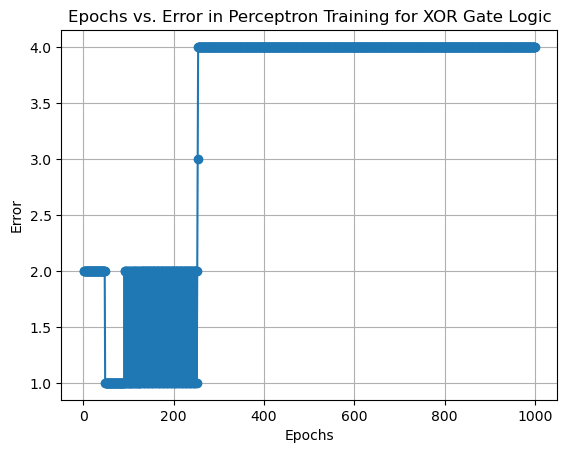

Number of epochs needed for convergence: 1000


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initializing the weights and learning rate
c = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Defining the activation function (Step function)
def activation_function(x):
    return 1 if x > 0 else 0

# Defining the input data 
X = np.array([
    [1, 0, 0], 
    [1, 0, 1],  
    [1, 1, 0],  
    [1, 1, 1] 
])

# Defining the target labels 
target_labels = np.array([0, 1, 1, 0])  

# Training the perceptron
epochs = 1000 
error_history = []  

for epoch in range(epochs):
    errors = 0
    for i in range(len(X)):
        input_data = X[i]
        target = target_labels[i]
        
        # Calculating the weighted sum of inputs
        weighted_sum = np.dot(input_data, W)
        
        # Applying the activation function
        prediction = activation_function(weighted_sum)
        
        # Calculating the error
        error = target - prediction
        
        # Updating the weights
        delta_weights = learning_rate * error * input_data
        W += delta_weights
        
        errors += abs(error)
    
    error_history.append(errors)
    
    # Checking if all examples are classified correctly
    if errors == 0:
        break

# Print the final weights
print("Final Weights (W0, W1, W2):", W)

# Calculate the sum-square error against all training samples for each epoch
epoch_numbers = list(range(1, len(error_history) + 1))

# Plot the epochs against the error values
plt.plot(epoch_numbers, error_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in Perceptron Training for XOR Gate Logic')
plt.grid(True)
plt.show()

# Print the number of epochs needed for convergence
print(f"Number of epochs needed for convergence: {len(error_history)}")


In [10]:
import numpy as np

# Defining the data
d = [
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0],
]

# Normalizing the features
d = np.array(data)
mean = d[:, :-1].mean(axis=0)
std = d[:, :-1].std(axis=0)
d[:, :-1] = (d[:, :-1] - mean) / std

# Initializing weights and bias
np.random.seed(0)
weights = np.random.rand(3)
bias = np.random.rand()

# Defining the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Setting the learning rate
learning_rate = 0.01

# Training the perceptron
epochs = 1000
for epoch in range(epochs):
    total_error = 0
    for row in data:
        candies, mangoes, milk_packets, payment, label = row
        z = weights[0] * candies + weights[1] * mangoes + weights[2] * milk_packets + bias
        y_pred = sigmoid(z)
        error = label - y_pred
        weights[0] += learning_rate * error * y_pred * (1 - y_pred) * candies
        weights[1] += learning_rate * error * y_pred * (1 - y_pred) * mangoes
        weights[2] += learning_rate * error * y_pred * (1 - y_pred) * milk_packets
        bias += learning_rate * error * y_pred * (1 - y_pred)
        total_error += error
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Error = {total_error}")

# Classify new transactions
def classify_transaction(candies, mangoes, milk_packets):
    normalized_data = (np.array([candies, mangoes, milk_packets]) - mean[:-1]) / std[:-1]  
    z = np.dot(weights, normalized_data) + bias
    y_pred = sigmoid(z)
    if y_pred >= 0.5:
        return "High Value Tx"
    else:
        return "Low Value Tx"

# Example 
new_transaction = (20, 6, 2)
classification = classify_transaction(*new_transaction)
print(f"New Transaction: {new_transaction} => Classification: {classification}")

Epoch 0: Total Error = -0.30804367806712996
Epoch 100: Total Error = 0.06762610533554453
Epoch 200: Total Error = 0.21066656738835343
Epoch 300: Total Error = 0.24953307053084312
Epoch 400: Total Error = 0.2487702423673912
Epoch 500: Total Error = 0.2344215101085918
Epoch 600: Total Error = 0.2165595776978424
Epoch 700: Total Error = 0.19897385032326342
Epoch 800: Total Error = 0.182973983067366
Epoch 900: Total Error = 0.16888766102602493
New Transaction: (20, 6, 2) => Classification: High Value Tx


In [11]:
import numpy as np

# Defining the data
d = [
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0],
]

# Extracting features and labels
X = np.array([row[:-1] for row in data])
y = np.array([row[-1] for row in data])

# Adding a bias term (constant feature)
X = np.c_[X, np.ones(X.shape[0])]

# Computing the pseudo-inverse
pseudo_inverse = np.linalg.pinv(X)

# Computing the weights using the pseudo-inverse
weights = np.dot(pseudo_inverse, y)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Classifying new transactions using the weights
def classify_transaction_pseudo_inverse(candies, mangoes, milk_packets):
    new_data = np.array([candies, mangoes, milk_packets, 1])  
    z = np.dot(new_data, weights[:-1]) + weights[-1]  
    y_pred = sigmoid(z)
    if y_pred >= 0.5:
        return "High Value Tx"
    else:
        return "Low Value Tx"

# Example 
new_transaction = (20, 6, 2)
classification = classify_transaction_pseudo_inverse(*new_transaction)
print(f"Pseudo-Inverse - New Transaction: {new_transaction} => Classification: {classification}")

Pseudo-Inverse - New Transaction: (20, 6, 2) => Classification: Low Value Tx


In [12]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input data and target labels for the AND gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [0], [0], [1]])  # Target labels

# Initialize the network weights randomly
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Define the learning rate
learning_rate = 0.05

# Training the neural network
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Test the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = sigmoid(np.dot(sigmoid(np.dot(test_data, weights_input_hidden)), weights_hidden_output))

# Print the predictions
for i in range(len(test_data)):
    print(f"Input: {test_data[i]}, Predicted Output: {predictions[i][0]:.4f}")


Input: [0 0], Predicted Output: 0.0027
Input: [0 1], Predicted Output: 0.0921
Input: [1 0], Predicted Output: 0.1027
Input: [1 1], Predicted Output: 0.8555


In [13]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input data and target labels for the XOR gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Target labels for XOR

# Initialize the network weights randomly
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Define the learning rate
learning_rate = 0.05

# Training the neural network
epochs = 10000

for epoch in range(epochs):
    # Forwarding pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculating the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Testting the trained neural network on XOR gate logic
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = sigmoid(np.dot(sigmoid(np.dot(test_data, weights_input_hidden)), weights_hidden_output))

# Printing the predictions
for i in range(len(test_data)):
    print(f"Input: {test_data[i]}, Predicted Output: {predictions[i][0]:.4f}")


Input: [0 0], Predicted Output: 0.3357
Input: [0 1], Predicted Output: 0.6114
Input: [1 0], Predicted Output: 0.6107
Input: [1 1], Predicted Output: 0.4776


In [16]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the input data and target labels for the AND gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  

# Initialize the network weights randomly
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 2  

# Initialize weights and biases
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Define the learning rate
learning_rate = 0.05

# Training the neural network
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Test the trained neural network on AND gate logic
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = sigmoid(np.dot(sigmoid(np.dot(test_data, weights_input_hidden)), weights_hidden_output))

# Print the predictions
for i in range(len(test_data)):
    logic_gate_output = [1, 0] if np.array_equal(y[i], [1, 0]) else [0, 1]
    print(f"Input: {test_data[i]}, Predicted Output: {predictions[i]}, Logic Gate Output: {logic_gate_output}")


Input: [0 0], Predicted Output: [0.99576581 0.00467742], Logic Gate Output: [1, 0]
Input: [0 1], Predicted Output: [0.9498255  0.05130433], Logic Gate Output: [1, 0]
Input: [1 0], Predicted Output: [0.94356026 0.06154354], Logic Gate Output: [1, 0]
Input: [1 1], Predicted Output: [0.0765307  0.92085799], Logic Gate Output: [0, 1]


In [17]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the input data and target labels for the AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # Target labels for AND gate

# Create an instance of MLPClassifier with desired settings
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=0)

# Fit the model on the training data
mlp_and.fit(X_and, y_and)

# Predict the outputs
predictions_and = mlp_and.predict(X_and)

# Print the predictions
for i in range(len(X_and)):
    print(f"Input: {X_and[i]}, Predicted Output: {predictions_and[i]}")


Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


In [18]:
# Define the input data and target labels for the XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # Target labels for XOR gate

# Create an instance of MLPClassifier with desired settings
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=0)

# Fit the model on the training data
mlp_xor.fit(X_xor, y_xor)

# Predict the outputs
predictions_xor = mlp_xor.predict(X_xor)

# Print the predictions
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]}, Predicted Output: {predictions_xor[i]}")


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1


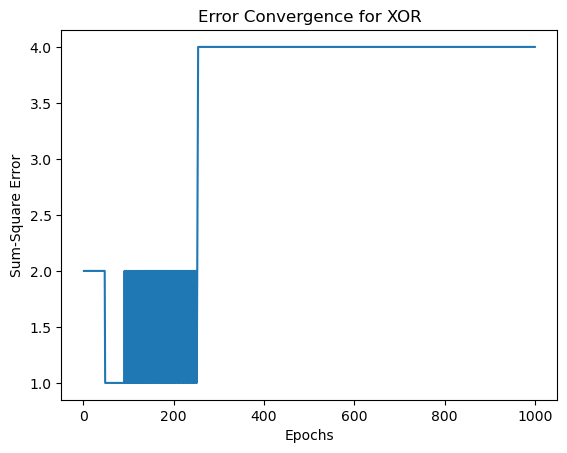

Final Weights: [ 0.1 -0.1 -0.1]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate training data
# Input data (X) and corresponding target labels (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Initialize weights and bias
W = np.array([10, 0.2, -0.75])  # Initial weights, including bias
learning_rate = 0.05
epochs = 1000  # Maximum number of epochs
errors = []  # To store the sum-square-error for each epoch

# Step activation function
def step(x):
    return 1 if x > 0 else 0

# Training the perceptron
for epoch in range(epochs):
    error_sum = 0
    for i in range(len(X)):
        # Calculate the predicted output (Y_pred) using the current weights
        Y_pred = step(np.dot(X[i], W[1:]) + W[0])  # Adding bias term
        
        # Calculate the error
        error = Y[i] - Y_pred
        error_sum += error ** 2
        
        # Update weights
        W[1:] += learning_rate * error * X[i]
        W[0] += learning_rate * error  # Update bias
    
    errors.append(error_sum)

    # Check for convergence
    if error_sum == 0:
        print(f"Converged in {epoch + 1} epochs.")
        break

# Plotting the error values
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence for XOR')
plt.show()

# Print the final weights
print("Final Weights:", W)


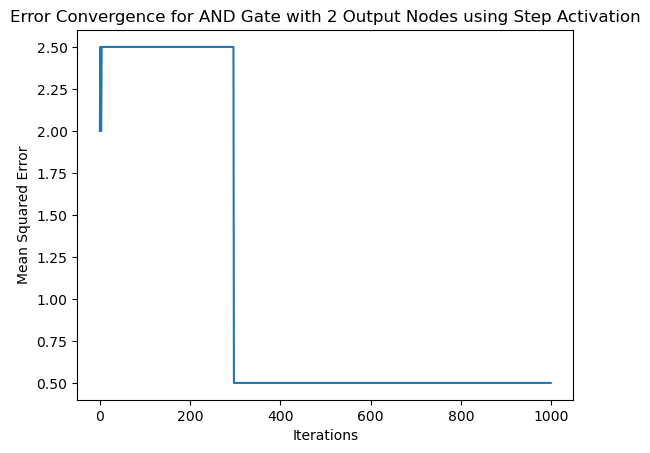

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.where(x > 0, 1, 0)

# AND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

# Initialization
v11 = np.random.uniform(size=(2, 1))
v12 = np.random.uniform(size=(2, 1))
v21 = np.random.uniform(size=(2, 1))
v22 = np.random.uniform(size=(2, 1))

w11 = np.random.uniform(size=(1, 1))
w12 = np.random.uniform(size=(1, 1))
w21 = np.random.uniform(size=(1, 1))
w22 = np.random.uniform(size=(1, 1))

learning_rate = 0.05
errors = []

for iteration in range(1000):
    total_error = np.zeros(2)
    
    for xi, target in zip(X, y):
        # Forward Propagation
        av11 = step(np.dot(xi, v11))
        av12 = step(np.dot(xi, v12))
        av21 = step(np.dot(xi, v21))
        av22 = step(np.dot(xi, v22))
        
        h1 = (av11 + av21).reshape(-1, 1)  # Reshape
        h2 = (av12 + av22).reshape(-1, 1)  # Reshape
        
        o1 = step(np.dot(h1.T, w11) + np.dot(h2.T, w21))
        o2 = step(np.dot(h1.T, w12) + np.dot(h2.T, w22))
        
        output = np.array([o1, o2]).reshape(2,)
        
        # Compute Error
        error = target - output
        
        total_error += error**2
        
        # Update weights
        w11 += learning_rate * h1 * error[0]
        w12 += learning_rate * h1 * error[1]
        w21 += learning_rate * h2 * error[0]
        w22 += learning_rate * h2 * error[1]
        
        delta = learning_rate * xi.reshape(2, 1)
        v11 += delta * (w11 * error[0] + w12 * error[1])
        v12 += delta * (w11 * error[0] + w12 * error[1])
        v21 += delta * (w21 * error[0] + w22 * error[1])
        v22 += delta * (w21 * error[0] + w22 * error[1])

    errors.append(np.mean(total_error))
    
    if np.all(np.array(total_error) <= 0.002):
        print(f"Converged at iteration {iteration}")
        break

# Plotting
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Error Convergence for AND Gate with 2 Output Nodes using Step Activation')
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
data = pd.read_csv('code_only.csv')
data=data.replace(6.5,6)
data=data.replace(88,8)


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-0.560180,0.397133,-0.067608,-1.361568,-1.189112,0.362005,-2.113351,-0.945830,0.967215,-1.035563,...,-1.982848,-2.182985,-1.788343,-1.500597,0.575761,-1.418272,1.969096,-1.663663,0.929276,10.0
1,-0.617345,0.004933,0.107997,-1.275459,-1.116872,0.391739,-2.048924,-1.050489,0.850765,-1.035608,...,-1.709290,-2.184924,-1.784352,-1.194703,0.194767,-1.383189,2.073854,-1.415486,0.632933,8.0
2,-0.597761,0.410195,-0.095720,-1.338432,-1.206770,0.355120,-2.098167,-0.965952,0.973628,-1.008978,...,-2.004396,-2.188181,-1.790508,-1.496068,0.613387,-1.429072,1.965157,-1.676064,0.918330,7.0
3,-0.546645,0.208720,-0.045373,-1.222537,-1.078728,0.421885,-2.104985,-1.122851,0.968126,-0.895802,...,-1.837438,-2.176035,-1.723567,-1.477411,0.382508,-1.410528,1.997823,-1.583785,0.787734,5.0
4,-0.643125,0.430050,-0.008826,-1.351897,-1.171904,0.367173,-2.125630,-0.877730,0.865652,-1.048714,...,-1.947140,-2.250539,-1.726540,-1.531785,0.549569,-1.434322,2.015190,-1.620357,1.025025,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.765830,-2.682315,-1.481811,1.248640,-0.725905,1.540399,-0.321199,-0.397931,-0.888173,0.497768,...,-0.909174,0.503568,-0.641167,-1.294205,-2.402035,-1.718075,-0.915480,-2.096138,0.412238,1.0
1172,-1.898498,-1.897484,-1.761415,0.662543,-0.868898,1.392034,-0.985371,-0.187743,-0.496623,0.845496,...,-1.382139,0.097382,-1.010758,-1.461787,-1.710525,-1.110383,-0.824634,-1.276787,0.273552,8.0
1173,-1.931803,-4.522925,0.445944,0.603920,1.469562,-4.925057,-0.936538,-0.120320,0.228790,-2.796853,...,0.972262,-0.030479,0.135137,1.463492,-1.170290,0.936117,-1.204324,1.097006,-0.862900,2.0
1174,-1.669846,-2.186171,-2.102323,0.619586,-0.960931,1.629884,-0.794663,-0.106962,-0.479505,0.925149,...,-1.258445,0.197480,-0.972337,-1.168023,-1.738411,-1.155843,-0.791999,-1.303357,0.551702,8.0


In [5]:
#class = lambda df['score']: 0 if df['score'] <= 5 else 1
data["class"]=data['score'].apply(lambda x: 0 if x <= 5 else 1)

In [6]:
#dividing dataset into two datas 
X = data.iloc[:, 0:767]
y = data['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



#Create an instance of MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='adam',                
    max_iter=1000,                
    learning_rate_init=0.001,     
    random_state=0                
)

# Fit the model
mlp_classifier.fit(X_train, y_train)

#Evaluate the model
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        71
           1       0.83      0.87      0.85       165

    accuracy                           0.78       236
   macro avg       0.74      0.73      0.73       236
weighted avg       0.78      0.78      0.78       236

